## Text Classifcaiton With RNN

### Load the IMDB dataset

In [0]:
from tensorflow.keras.datasets import imdb

max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(25000,)

In [0]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [0]:
# [len(x) for x in x_train[:10]]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 80
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [0]:
# [len(x) for x in x_train[:10]]

[80, 80, 80, 80, 80, 80, 80, 80, 80, 80]

In [0]:
x_train.shape

(25000, 80)

In [0]:
x_train[5]

In [0]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(256))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [0]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, LSTM

# model = Sequential()
# model.add(Embedding(max_features, 128))
# model.add(LSTM(256))
# model.add(Dense(1, activation='sigmoid'))

In [0]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, GRU

# model = Sequential()
# model.add(Embedding(max_features, 128))
# model.add(GRU(256))
# model.add(Dense(1, activation='sigmoid'))

In [0]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, LSTM

# model = Sequential()
# model.add(Embedding(max_features, 128))
# model.add(LSTM(256, return_sequences= True))
# model.add(LSTM(256, return_sequences= True))
# model.add(LSTM(256))
# model.add(Dense(1, activation='sigmoid'))

In [0]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional

# model = Sequential()
# model.add(Embedding(max_features, 128))
# model.add(Bidirectional(LSTM(256)))
# model.add(Dense(1, activation='sigmoid'))

### Train the Model

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, 
                    epochs=15,
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.4241 - accuracy: 0.8014 - val_loss: 0.4130 - val_accuracy: 0.8170
Epoch 2/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.2547 - accuracy: 0.8999 - val_loss: 0.3942 - val_accuracy: 0.8384
Epoch 3/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.1639 - accuracy: 0.9385 - val_loss: 0.4794 - val_accuracy: 0.8310
Epoch 4/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.1140 - accuracy: 0.9567 - val_loss: 0.5519 - val_accuracy: 0.8217
Epoch 5/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.0774 - accuracy: 0.9735 - val_loss: 0.6452 - val_accuracy: 0.8205
Epoch 6/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.0518 - accuracy: 0.9827 - val_loss: 0.7315 - val_accuracy: 0.8228
Epoch 7/15
25000/25000 [==============================] 

### Evaluate the Model

In [0]:
score, acc = model.evaluate(x_test, y_test,batch_size=batch_size)
score, acc

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(1.0591298265457154, 0.81304)

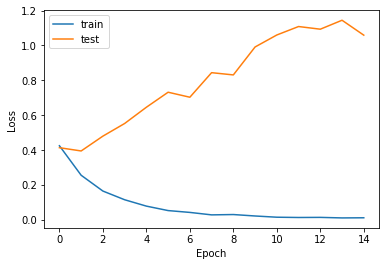

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

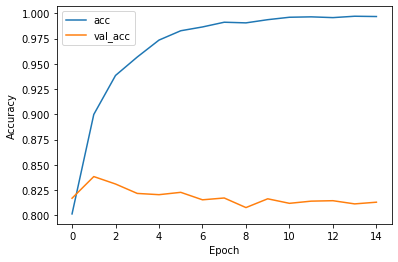

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='train')
plt.plot(epoch,val_acc,label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
from tensorflow.keras.datasets import imdb

max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [0]:
from tensorflow.keras.datasets import imdb

max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [0]:
from keras.preprocessing import sequence
max_len = 80
X_train = sequence.pad_sequences(X_train, 
                                 maxlen = max_len, 
                                 padding = 'pre', 
                                 truncating = 'pre')
X_test = sequence.pad_sequences(X_test,
                                maxlen = max_len)

In [0]:
X_train

array([[   15,   256,     4, ...,    19,   178,    32],
       [  125,    68,     2, ...,    16,   145,    95],
       [  645,   662,     8, ...,     7,   129,   113],
       ...,
       [  529,   443, 17793, ...,     4,  3586,     2],
       [  286,  1814,    23, ...,    12,     9,    23],
       [   97,    90,    35, ...,   204,   131,     9]], dtype=int32)

In [0]:
# Step 2 Define Model

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU

In [0]:
model = Sequential()
model.add(Embedding(max_words,128))
model.add(LSTM(32))
# model.add(GRU(32))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,580,641
Trainable params: 2,580,641
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Step 3: Compile Model

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit(X_train, y_train, 
                    epochs = 5,
                    validation_split = 0.3)




Train on 17500 samples, validate on 7500 samples
Epoch 1/5





17500/17500 [==============================] - 73s 4ms/step - loss: 0.4460 - acc: 0.7862 - val_loss: 0.3616 - val_acc: 0.8396
Epoch 2/5
17500/17500 [==============================] - 63s 4ms/step - loss: 0.2358 - acc: 0.9071 - val_loss: 0.3822 - val_acc: 0.8244
Epoch 3/5
17500/17500 [==============================] - 61s 4ms/step - loss: 0.1358 - acc: 0.9527 - val_loss: 0.4695 - val_acc: 0.8229
Epoch 4/5
17500/17500 [==============================] - 61s 4ms/step - loss: 0.0794 - acc: 0.9732 - val_loss: 0.6242 - val_acc: 0.8204
Epoch 5/5
17500/17500 [==============================] - 62s 4ms/step - loss: 0.0540 - acc: 0.9824 - val_loss: 0.7517 - val_acc: 0.8145


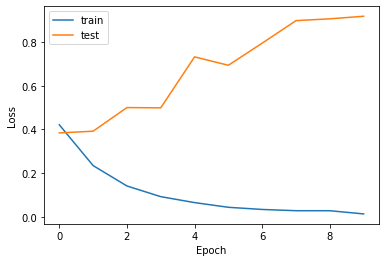

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

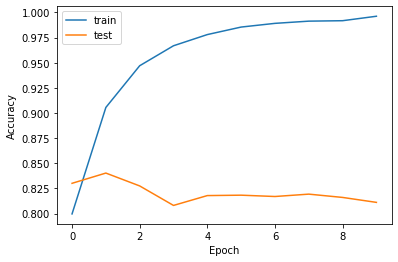

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(len(acc))

plt.plot(epoch,acc,label='train')
plt.plot(epoch,val_acc,label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Stack RNN

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(32, return_sequences= True))
model.add(LSTM(32, return_sequences= True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))



## Bidirectional RNN

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))